In [ ]:
#@title Import Libraries
from google.colab import files 
!pip install -q kaggle
uploaded = files.upload()
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"


Saving kaggle.json to kaggle.json


In [ ]:
#@title Download Dataset
!kaggle datasets download -d ilhamfp31/kue-indonesia

 95% 289M/303M [00:04<00:00, 44.0MB/s]
100% 303M/303M [00:04<00:00, 70.4MB/s]


In [ ]:
#@title Checking list of files in Directory
!ls

kaggle.json  kue-indonesia.zip	sample_data


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  kue-indonesia.zip
  inflating: test/kue_dadar_gulung/0.jpg  
  inflating: test/kue_dadar_gulung/1.jpg  
  inflating: test/kue_dadar_gulung/10.jpg  
  inflating: test/kue_dadar_gulung/11.jpg  
  inflating: test/kue_dadar_gulung/12.jpg  
  inflating: test/kue_dadar_gulung/13.jpg  
  inflating: test/kue_dadar_gulung/14.jpg  
  inflating: test/kue_dadar_gulung/15.jpg  
  inflating: test/kue_dadar_gulung/16.jpg  
  inflating: test/kue_dadar_gulung/17.jpg  
  inflating: test/kue_dadar_gulung/18.jpg  
  inflating: test/kue_dadar_gulung/19.jpg  
  inflating: test/kue_dadar_gulung/2.jpg  
  inflating: test/kue_dadar_gulung/3.jpg  
  inflating: test/kue_dadar_gulung/4.jpg  
  inflating: test/kue_dadar_gulung/5.jpg  
  inflating: test/kue_dadar_gulung/6.jpg  
  inflating: test/kue_dadar_gulung/7.jpg  
  inflating: test/kue_dadar_gulung/8.jpg  
  inflating: test/kue_dadar_gulung/9.jpg  
  inflating: test/kue_kastengel/0.jpg  
  inflating: test/kue_kastengel/1.jpg  
  inflating: test/kue_

In [ ]:
#@title Define directory for training and validation data
base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training pictures
train_dadar_dir = os.path.join(train_dir, 'kue_dadar_gulung')
train_kastengel_dir = os.path.join(train_dir, 'kue_kastengel')
train_klepon_dir = os.path.join(train_dir, 'kue_klepon')
train_lapis_dir = os.path.join(train_dir, 'kue_lapis')
train_lumpur_dir = os.path.join(train_dir, 'kue_lumpur')
train_putrisalju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_risoles_dir = os.path.join(train_dir, 'kue_risoles')
train_serabi_dir = os.path.join(train_dir, 'kue_serabi')

# Directory with our validation pictures
validation_dadar_dir = os.path.join(validation_dir, 'kue_dadar_gulung')
validation_kastengel_dir = os.path.join(validation_dir, 'kue_kastengel')
validation_klepon_dir = os.path.join(validation_dir, 'kue_klepon')
validation_lapis_dir = os.path.join(validation_dir, 'kue_lapis')
validation_lumpur_dir = os.path.join(validation_dir, 'kue_lumpur')
validation_putrisalju_dir = os.path.join(validation_dir, 'kue_putri_salju')
validation_risoles_dir = os.path.join(validation_dir, 'kue_risoles')
validation_serabi_dir = os.path.join(validation_dir, 'kue_serabi')

In [ ]:
#@title Define Classes Names
class_names = ['kue_dadar_gulung', 'kue_kastengel', 'kue_klepon', 'kue_lapis', 'kue_lumpur', 'kue_putri_salju', 'kue_risoles', 'kue_serabi']
print(class_names[0])

kue_dadar_gulung


In [ ]:
#@title Classification Model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=48,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=8,  # 1000 images = batch_size * steps
      verbose=2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 1516 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Epoch 1/30
48/48 - 89s - loss: 1.9384 - accuracy: 0.2025 - val_loss: 1.6555 - val_accuracy: 0.3313
Epoch 2/30
48/48 - 88s - loss: 1.6607 - accuracy: 0.3536 - val_loss: 1.6037 - val_accuracy: 0.2812
Epoch 3/30
48/48 - 88s - loss: 1.5571 - accuracy: 0.3885 - val_loss: 1.4098 - val_accuracy: 0.5312
Epoch 4/30
48/48 - 88s - loss: 1.4871 - accuracy: 0.4406 - val_loss: 1.3057 - val_accuracy: 0.5375
Epoch 5/30
48/48 - 88s - loss: 1.4287 - accuracy: 0.4624 - val_loss: 1.2213 - val_accuracy: 0.6000
Epoch 6/30
48/48 - 88s - loss: 1.3836 - accuracy: 0.4677 - val_loss: 1.2536 - val_accuracy: 0.5437
Epoch 7/30
48/48 - 88s - loss: 1.3575 - accuracy: 0.4954 - val_loss: 1.1604 - val_accuracy: 0.5875
Epoch 8/30
48/48 - 88s - loss: 1.2947 - accuracy: 0.5224 - val_loss: 1.2239 - val_accuracy: 0.5813
Epoch 9/30
48/48 - 88s - loss: 1.2511 - accuracy: 0.5422 - val_loss: 1.0815 - val_accuracy: 0.6062
Epoch 10/30
48/48 - 88s - 

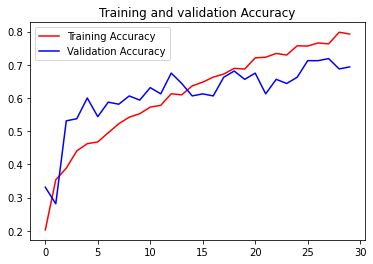

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

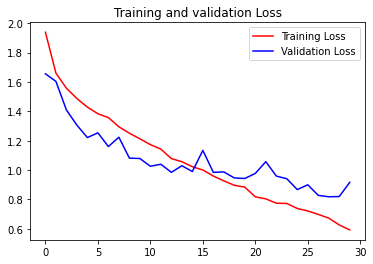

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title Plotting Accuracy and Loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

In [ ]:
#@title Upload Test Image and get Image Prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  x = np.where(classes[0]==1)[0][0] 
  print("ini", class_names[x])

Saving kue-putri-salju-keju.jpg to kue-putri-salju-keju.jpg
kue-putri-salju-keju.jpg
[[0. 0. 0. 0. 0. 1. 0. 0.]]
ini kue_putri_salju


In [ ]:
model.save("traditional cake_model.h5")
print("Saved model to disk")

Saved model to disk
